# Time series data

In this session we will demonstrate some of the many options of Pandas to import and manipulate time series data. The objective is to read data from two different sources and combine them to obtain a time series with daily values of water level, air temperature, relative humidity and rainfall.

As usual we start by importing the required libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Import pandas here
import pandas as pd

We will also select a time interval for the time series by defining the start and end dates. The `to_datetime` function converts the string provided to a `datetime64` data type, which is the underlying data type in Pandas for time series data. For more information see <A href="https://pandas.pydata.org/docs/user_guide/timeseries.html">https://pandas.pydata.org/docs/user_guide/timeseries.html</A>. Note that the `to_datetime` function can also accept other arguments than a string type, see <A href="https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html">https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html</A>.

In [5]:
t_min = pd.to_datetime("2013-08-25")
t_max = pd.to_datetime("2013-12-15")
t_max

Timestamp('2013-12-15 00:00:00')

Variables with a `datetime64` data type can be used for efficient time manipulation. We can for example calculate the number of days between `t_max` and `t_min` by subtracting them.

In [6]:
delta = t_max - t_min
delta

Timedelta('112 days 00:00:00')

***Exercise 1*** Execute the code cell below and inspect the output. Explain what happens.

In [7]:
t1 = pd.to_datetime('1-8-2023') # August 1
t2 = pd.to_datetime('31-8-2023') # August 31
print(t2-t1) # difference

235 days 00:00:00


C:\Users\vince\AppData\Local\Temp\ipykernel_28160\2868480716.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  t2 = pd.to_datetime('31-8-2023') # August 31


### Reading data from CSV-files
Let's try to read the data in water_level_example.csv. The `read_csv` method has multiple options for figuring out the date and time based on the values provided in the file. One method that the documentation (<A href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html</A>) suggests is the following

In [8]:
df0 = pd.read_csv("data/water_level_example.csv", parse_dates=["Date", "Time"])
df0.head()

C:\Users\vince\AppData\Local\Temp\ipykernel_28160\455262355.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df0 = pd.read_csv("data/water_level_example.csv", parse_dates=["Date", "Time"])


,Date,Time,ms,LEVEL,TEMPERATURE,CONDUCTIVITY
0,2013-08-25,2024-08-23 00:00:00,0,0.938222,10.6,0.205
1,2013-08-25,2024-08-23 01:00:00,0,0.937608,10.7,0.206
2,2013-08-25,2024-08-23 02:00:00,0,0.939127,10.8,0.206
3,2013-08-25,2024-08-23 03:00:00,0,0.934339,10.7,0.206
4,2013-08-25,2024-08-23 04:00:00,0,0.935828,10.7,0.206


That somehow does not seem to have worked: The 'Date' column appears exactly as it was in the file and the 'Time' column has today's date added to each row which is quite unexpected. What we wanted instead was the 'Date' and 'Time' columns to be merged into a single column that has the datetime64 data type. Since this has not worked we need to try something different (usually you'll try to look for an answer on <A href="https://stackoverflow.com/">https://stackoverflow.com/</A> in a situation like this one). For example

In [9]:
df0 = pd.read_csv("data/water_level_example.csv")
new_index = pd.to_datetime(df0["Date"].astype(str) + " " + df0["Time"].astype(str))
new_index

0      2013-08-25 00:00:00
1      2013-08-25 01:00:00
2      2013-08-25 02:00:00
3      2013-08-25 03:00:00
4      2013-08-25 04:00:00
               ...        
2684   2013-12-14 20:00:00
2685   2013-12-14 21:00:00
2686   2013-12-14 22:00:00
2687   2013-12-14 23:00:00
2688   2013-12-30 00:00:00
Length: 2689, dtype: datetime64[ns]

In [10]:
df0 = df0.set_index(new_index)
print(df0.head())

                           Date      Time  ms     LEVEL  TEMPERATURE  \
2013-08-25 00:00:00  2013/08/25  00:00:00   0  0.938222         10.6   
2013-08-25 01:00:00  2013/08/25  01:00:00   0  0.937608         10.7   
2013-08-25 02:00:00  2013/08/25  02:00:00   0  0.939127         10.8   
2013-08-25 03:00:00  2013/08/25  03:00:00   0  0.934339         10.7   
2013-08-25 04:00:00  2013/08/25  04:00:00   0  0.935828         10.7   

                     CONDUCTIVITY  
2013-08-25 00:00:00         0.205  
2013-08-25 01:00:00         0.206  
2013-08-25 02:00:00         0.206  
2013-08-25 03:00:00         0.206  
2013-08-25 04:00:00         0.206  


That looks more like it: The index now contains the datetime info. We can delete the original 'Date' and 'Time' columns to avoid storing redundant information. In fact, the 'ms' column doesn't look particularly useful, so let's also delete that one. The `drop` looks in the DataFrame's index by default, so it will delete rows for which a match is found with any of the names provided. Because we want to delete columns, and not rows, we have to override the default behaviour by passing `axis=1`.

In [11]:
df0 = df0.drop(["Date", "Time", "ms"], axis=1)
print(df0.head())

                        LEVEL  TEMPERATURE  CONDUCTIVITY
2013-08-25 00:00:00  0.938222         10.6         0.205
2013-08-25 01:00:00  0.937608         10.7         0.206
2013-08-25 02:00:00  0.939127         10.8         0.206
2013-08-25 03:00:00  0.934339         10.7         0.206
2013-08-25 04:00:00  0.935828         10.7         0.206


Let's plot the 'LEVEL' column to visualise the water level measurements.

<Axes: >

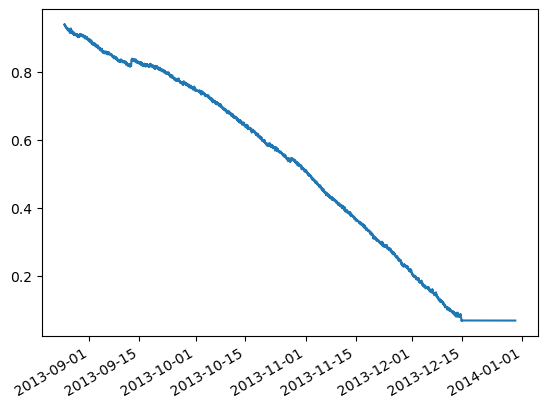

In [12]:
df0['LEVEL'].plot()

***Exercise 2*** In the plot above you can see a straight line at the end of the measurements. In the csv file you see that the last date is suddenly 15 days later than the second last. A straight line is drawn in the plot between them. Write the code to plot the water level measurements without this last date.

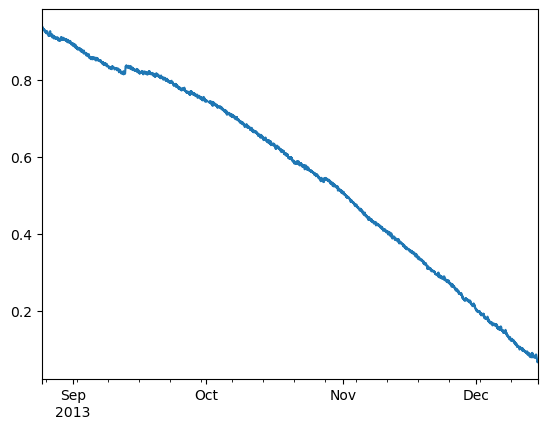

In [16]:
# Type your code here
idx = df0.index < df0.index[-1]
df0.loc[idx, 'LEVEL'].plot();

We can also zoom in to a shorter time period. Note that the dates can be passed as strings. Matplotlib understands these, which makes working with time series graphs a lot easier than it was years ago.

In [ ]:
ax = df0['LEVEL'].plot()
ax.set_xlim("2013-09-15", "2013-10-15")

We notice that there is a gap in the data on the first of October. There are many ways to deal with missing data, but for this particular example it seems justifiable to use linear interpolation to fill the gap. Pandas provides the `interpolate` method for this, and all we have to do is call it without any arguments

In [ ]:
df0 = df0.interpolate()
ax = df0['LEVEL'].plot()
ax.set_xlim("2013-09-15", "2013-10-15")

Indeed the gap is gone. The values stored in the csv file are water heights above the pressure transducer, so they still need to be converted to water levels with respect to the reference marker on the jetty pole. We do this by shifting the data series by fitting it through the manual water level measurements in the file `manual_readings.xlsx`, which are expressed with respect to the local reference point. Note that the manual measurements in the file are in cm above the reference point, so we divide by -100 to make sure they are in m and decrease in time, just like the water colum height measured by the transducer is decreasing with time.

In [ ]:
dfm = pd.read_excel("data/manual_readings.xlsx", index_col=0, parse_dates=True)

# add the manual reading to the water level dataframe
df0['manual'] = dfm / -100.

# plot the manual and logger measurements
fig, ax = plt.subplots()
ax.plot(df0.index, df0['LEVEL'])
ax.plot(df0.index, df0['manual'], 'o')

One way to calcuate the required offset is to calculate the mean of the differences between the manual and the pressure transducer readings. Note that the column `manual` in `df0` contains many NaN values, so the `nanmean` method from NumPy is used so that these are ignored in calculating the mean.

In [ ]:
# calculate offset
wl_offset = np.nanmean(df0['manual'] - df0['LEVEL'])

# plot data
fig, ax = plt.subplots()
ax.plot(df0.index, wl_offset + df0['LEVEL'])
ax.plot(df0.index, df0['manual'], 'o')

Now that the water levels are stored in the right way, we can move on to read the weather data. The problem to tackle with these is that they are spread across multiple worksheets in an Excel file, with each worksheet containing the data of a particular month. Fortunately it is not too difficult to merge the data from the various sheets into a single DataFrame. The first thing to do is to call the Pandas method `read_excel` and explicitly pass `sheet_name=None` as an argument. Note that the other two arguments ensure that the dates are parsed correctly.

In [ ]:
sheets_dict = pd.read_excel(
    "data/weather_data_by_month.xlsx",
    index_col=0,
    parse_dates=True,
    sheet_name=None,
)


The effect of passing `sheet_name=None` is that `read_excel` returns a dictionary with the worksheets. Each worksheet is read as a DataFrame and is accessible in the dictionary by passing the sheet name as a key. So by iterating over the dictionary items, we can grab each DataFrame. By defining an empty DataFrame first, each DataFrame from `sheets_dict` can be appended using the `concat` function to create the DataFrame with all the data.

In [ ]:
dfd = pd.DataFrame()
for sheet_name, df in sheets_dict.items():
    dfd = pd.concat((dfd, df))

***Exercise***: Inspect the contents of `dfd`. What columns are there and at what time interval were the measurements recorded?

Now let's trim the DataFrame with weather data to the period of interest

In [ ]:
idx = (dfd.index >= t_min) & (dfd.index <= t_max)
dfd = dfd.loc[idx]

We can combine the weather data with the water level data if we keep in mind that the water levels were reported at hourly intervals, so they must be resampled to daily values. For this, Pandas provides the `resample` function, which is called here with the argument `1D`, which indicates that the measurements need to be aggregated at a one-day interval. The `.mean()` at the end indicates that the values need to be averaged. These daily averages can be added as a new column to `dfd`

In [ ]:
dfwl = wl_offset + df0["LEVEL"].resample('1D').mean()
dfd['wl'] = dfwl

## Homework exercise: Vapour pressure deficit

The evaporative demand of the atmosphere depends on the vapour pressure deficit ($vpd$), which is the difference between the saturation vapour pressure $e_s$ and the actual vapour pressure ($e_a$):

$vpd = e_s - e_a$

where 

$ e_a = \frac{rh}{100} e_s$

in which $rh$ is the relative humidity in percent, and 

$ e_s = 0.6108 e^{\frac{17.27 T}{T + 237.3}}$

In the equations above $vpd$, $e_a$ and $e_s$ are expressed kPa and the temperature $T$ is in °C. For more details see <A href="https://www.fao.org/3/x0490e/x0490e07.htm">https://www.fao.org/3/x0490e/x0490e07.htm</A>.

***Exercise***: Use the equations above to calculate the $vpd$ with the available temperature and relative humidity (RH) data. Add the result as a column to the DataFrame `dfd` and save the DataFrame to an Excel file.

In [ ]:
# Type Answer Here
e_s = 0.6108 * np.exp(17.27 * dfd["temperature"] / (dfd["temperature"] + 237.3))
e_a = dfd["rh"] / 100 * e_s
dfd["vpd"] = e_s - e_a
dfd.head()

## Bonus: Compute potential evaporation using PyET

Potential evaporation can be estimated with many different methods. [PyET is a Python package](https://github.com/pyet-org/pyet) for the estimation of evaporation, using one of the almost 20 different methods (see, for example, [Vremec et al. (2024)](https://gmd.copernicus.org/preprints/gmd-2024-63/)).

1. Use pip to install pyet (find instructions here: https://github.com/pyet-org/pyet)
2. Use the `Haude` and `Hamon` Methods (or more if you want) to compute potential evaporation (use lat=37.5 for the latitude)
3. Make a plot of the two evaporation fluxes
4. Which one would you use?

In [ ]:
# Import Pyet
import pyet

# Compute evaporation
pet_haude = pyet.haude(tmean=dfd.loc[:, "temperature"], rh=dfd.loc[:, "rh"])
pet_hamon = pyet.hamon(tmean=dfd.loc[:, "temperature"], lat=37.5)

# Make a plot
pet_haude.plot(figsize=(6, 2))
pet_hamon.plot()